# Assignment 1

## Data Preparation

In [100]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
mpl.style.use(['ggplot'])

%matplotlib inline

In [101]:
data_pelatihan = pd.read_excel('./dataset/Feedback_Lat_2020.xlsx')
data_elearn = pd.read_excel('./dataset/ELearn_2020.xlsx')
data_feedback_elearn= pd.read_excel('./dataset/Feedback_ELearn_2020.xlsx')

In [102]:
data_pelatihan.head(3)

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
0,Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Programmer Development Course Amoeba,80114271,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
data_pelatihan.set_index('Nama Pelatihan', inplace=True)
data_pelatihan.head()

,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,Status,...,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
Nama Pelatihan,,,,,,,,,,,,,,,,,,,,,
Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,On Going,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,On Going,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Programmer Development Course Amoeba,80114271,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Business Analytics Amoeba,80114280,LAT,Video Learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Online UX Design Course Amoeba,80114281,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
data_pelatihan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1581 entries, Social Media Ads & Analytic to SITAC & Litigasi
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Objid Pelatihan                    1581 non-null   int64  
 1   Category                           1581 non-null   object 
 2   Tipe                               895 non-null    object 
 3   Lokasi Pelatihan                   1447 non-null   object 
 4   Provider                           1480 non-null   object 
 5   Academy Event                      1459 non-null   object 
 6   Location                           1514 non-null   object 
 7   Provider Category                  1239 non-null   object 
 8   Event Type                         1526 non-null   object 
 9   Status                             1519 non-null   object 
 10  Tgl Mulai                          1581 non-null   object 
 11  Tgl Selesai            

In [105]:
data_pelatihan['Academy Event'] = data_pelatihan['Academy Event'].astype(str)

In [106]:
data_pelatihan['Tgl Mulai'] = pd.to_datetime(data_pelatihan['Tgl Mulai'])

In [107]:
data_pelatihan['Bulan'] = data_pelatihan['Tgl Mulai'].dt.month

## Area Plot 

In [108]:
data_Ac = data_pelatihan[['JML Peserta','Academy Event', 'Bulan']]
data_Ac.head()

,JML Peserta,Academy Event,Bulan
Nama Pelatihan,,,
Social Media Ads & Analytic,28,CONSUMER,12
CISM,4,NITS,12
Programmer Development Course Amoeba,1,DSP,12
Business Analytics Amoeba,1,DSP,12
Online UX Design Course Amoeba,1,DSP,12


In [109]:
data_Cons = data_Ac[data_Ac["Academy Event"].isin(['CONSUMER'])]

data_Cons.head()

,JML Peserta,Academy Event,Bulan
Nama Pelatihan,,,
Social Media Ads & Analytic,28,CONSUMER,12
Klarifikasi HCD Plan 2021,0,CONSUMER,12
Strategic Planning Professional Level 1,15,CONSUMER,12
\tMentoring Leadership in Teritorry (week-6),0,CONSUMER,12
Transforming from Relief to Recovery,5,CONSUMER,12


In [110]:
data_Cons.rename(columns={'JML Peserta':'Peserta Consumer'}, inplace=True)
data_Cons.head()

C:\Users\950351\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Peserta Consumer,Academy Event,Bulan
Nama Pelatihan,,,
Social Media Ads & Analytic,28,CONSUMER,12
Klarifikasi HCD Plan 2021,0,CONSUMER,12
Strategic Planning Professional Level 1,15,CONSUMER,12
\tMentoring Leadership in Teritorry (week-6),0,CONSUMER,12
Transforming from Relief to Recovery,5,CONSUMER,12


In [111]:
data_A = data_Cons.groupby('Bulan', axis=0)['Peserta Consumer'].sum()
data_A.head()

Bulan
1    158
2    984
3    220
4    174
5     35
Name: Peserta Consumer, dtype: int64

In [112]:
data_Ens = data_Ac[data_Ac["Academy Event"].isin(['ENTERPRISE'])]

In [113]:
data_Ens.head(3)

,JML Peserta,Academy Event,Bulan
Nama Pelatihan,,,
Rapat Pembahasan HCD Plan DBS 2021,3,ENTERPRISE,12
Mapping Content AM Pathway Digilearn,0,ENTERPRISE,12
Mapping Content AM - Marketing,0,ENTERPRISE,12


In [114]:
data_Ens.rename(columns={'JML Peserta':'Peserta Enterprise'}, inplace=True)
data_Ens.head()

C:\Users\950351\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Peserta Enterprise,Academy Event,Bulan
Nama Pelatihan,,,
Rapat Pembahasan HCD Plan DBS 2021,3,ENTERPRISE,12
Mapping Content AM Pathway Digilearn,0,ENTERPRISE,12
Mapping Content AM - Marketing,0,ENTERPRISE,12
Mapping Content AM PR 200.02,0,ENTERPRISE,12
Digitalisasi PDAM melalui implementasi smart water Meter serius #4,0,ENTERPRISE,12


In [115]:
data_B = data_Ens.groupby('Bulan', axis=0)['Peserta Enterprise'].sum()
data_B.head()

Bulan
1    134
2    137
3     74
4    396
5    311
Name: Peserta Enterprise, dtype: int64

In [116]:
data_Area = pd.concat([data_A, data_B], axis = 1, sort=False)
data_Area.head(12)

,Peserta Consumer,Peserta Enterprise
Bulan,,
1,158,134
2,984,137
3,220,74
4,174,396
5,35,311
6,424,133
7,926,1249
8,3646,1384
9,2569,2050


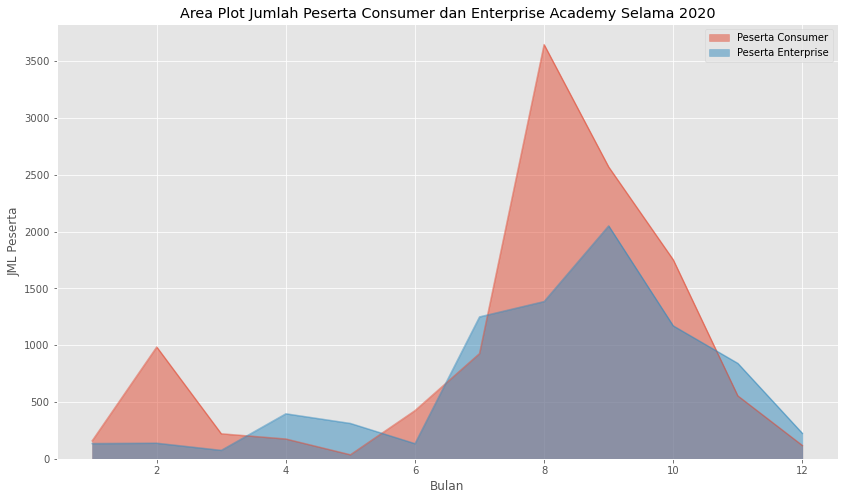

In [117]:
data_Area.plot(kind ='area', 
                stacked=False,
                figsize=(14, 8))


plt.title('Area Plot Jumlah Peserta Consumer dan Enterprise Academy Selama 2020')
plt.ylabel('JML Peserta')
plt.xlabel('Bulan')

plt.show()

## Histogram

In [118]:
dt_peserta = data_pelatihan['JML Peserta']
dt_peserta.head()

Nama Pelatihan
Social Media Ads & Analytic             28
CISM                                     4
Programmer Development Course Amoeba     1
Business Analytics Amoeba                1
Online UX Design Course Amoeba           1
Name: JML Peserta, dtype: int64

In [119]:
data_pelatihan.sort_values(by='JML Peserta', ascending=False, axis=0, inplace=True)

In [120]:
data_pelatihan.head(10)

,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,Status,...,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score,Bulan
Nama Pelatihan,,,,,,,,,,,,,,,,,,,,,
Living the Grand Why Batch 5,80113730,LAT,NaN,Bandung,Learning Area 3 / LO Bandung,BUSINNESS ENABLER,Online (Lokasi Masing-Masing),Internal,Internal,Close Budget,...,90.57,0,89.76,0.0,90.57,72.22,90.41,88.79,90.13,10
Living the Grand Why Batch 7,80113732,LAT,NaN,Bandung,Learning Area 3 / LO Bandung,BUSINNESS ENABLER,Online (Lokasi Masing-Masing),Internal,Internal,Close Budget,...,91.06,0,90.79,0.0,90.88,74.47,91.10,91.49,90.55,11
Living the Grand Why Batch 1,80113563,LAT,NaN,Bandung,Learning Area 3 / LO Bandung,BUSINNESS ENABLER,Online (Lokasi Masing-Masing),Internal,Internal,Close Budget,...,87.74,0,87.92,0.0,89.03,60.34,88.12,87.48,88.56,9
Living the Grand Why Batch 6,80113731,LAT,NaN,Bandung,Learning Area 3 / LO Bandung,BUSINNESS ENABLER,Online (Lokasi Masing-Masing),Internal,Internal,Close Budget,...,89.92,0,90.35,0.0,90.79,66.15,91.05,89.61,90.40,10
Living the Grand Why Batch 4,80113651,LAT,NaN,Bandung,Learning Area 3 / LO Bandung,BUSINNESS ENABLER,Online (Lokasi Masing-Masing),Internal,Internal,Close Budget,...,91.22,0,91.65,0.0,92.31,74.81,91.86,91.15,92.02,10
Living the Grand Why Batch 2,80113564,LAT,NaN,Bandung,Learning Area 3 / LO Bandung,BUSINNESS ENABLER,Online (Lokasi Masing-Masing),Internal,Internal,Close Budget,...,89.56,0,89.52,0.0,90.62,66.91,90.05,88.83,90.13,9
Living the Grand Why Batch 3,80113650,LAT,NaN,Bandung,Learning Area 3 / LO Bandung,BUSINNESS ENABLER,Online (Lokasi Masing-Masing),Internal,Internal,Close Budget,...,90.87,0,90.68,0.0,91.28,73.26,90.98,90.55,90.88,10
Sales Force TR-2 Batch-1,80113150,LAT,NaN,Surabaya,Learning Area 5 Surabaya,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,Close Budget,...,0.00,0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,8
Sales Force TR-2 Batch-2,80113151,LAT,NaN,Surabaya,Learning Area 5 Surabaya,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,Close Budget,...,73.05,0,75.62,0.0,74.41,-3.05,75.10,74.27,74.96,8


In [121]:
pelatihan_Top10 = data_pelatihan['JML Peserta'].head(10)

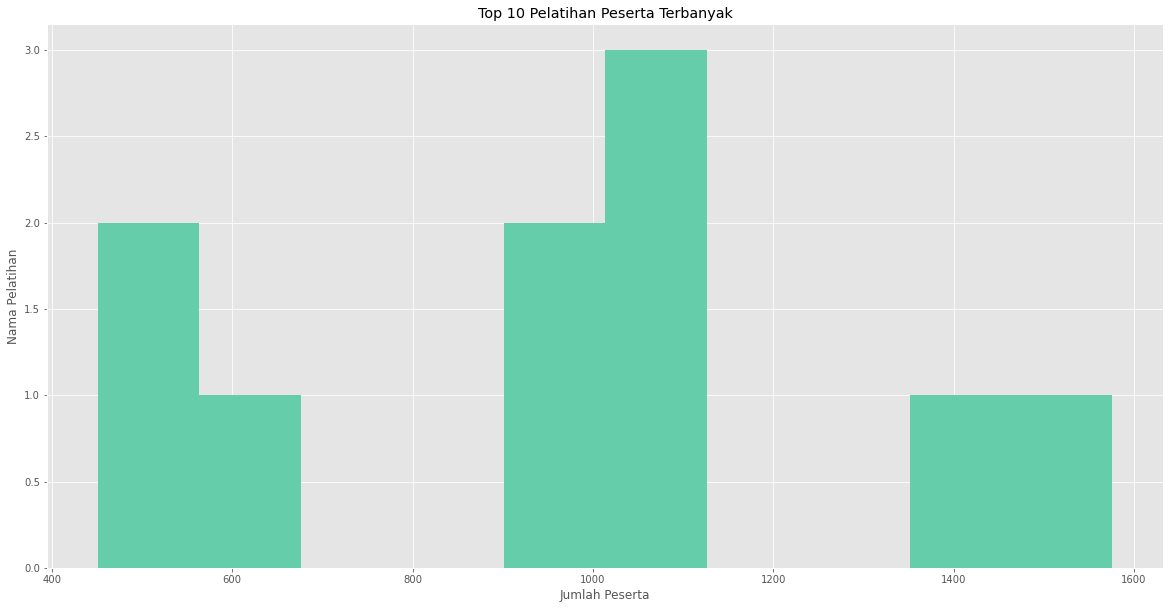

In [122]:
ax = pelatihan_Top10.plot(kind='hist',
            color='mediumaquamarine',
            figsize=(20, 10))

ax.set_title('Top 10 Pelatihan Peserta Terbanyak')
ax.set_ylabel('Nama Pelatihan')
ax.set_xlabel('Jumlah Peserta')

plt.show()

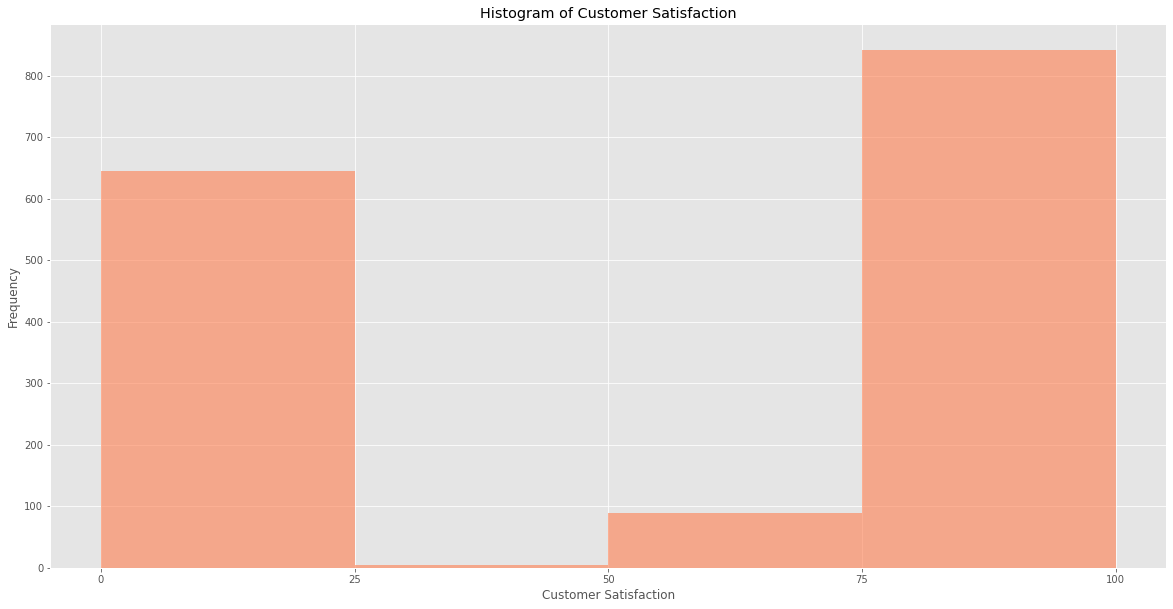

In [123]:
count, bin_edges = np.histogram(data_pelatihan['Customer Satisfaction'], 4)
ax = data_pelatihan['Customer Satisfaction'].plot(kind='hist',
                                             figsize=(20, 10),
                                             bins=4,
                                             alpha=0.6,
                                             xticks=bin_edges,
                                             color=['coral']
                                             )

ax.set_title('Histogram of Customer Satisfaction')
ax.set_xlabel('Customer Satisfaction')
plt.show()

## Bar Chart

In [124]:
b = data_pelatihan[['JML Peserta', 'JML Confirmed', 'JML Peserta Hadir']].head(10)

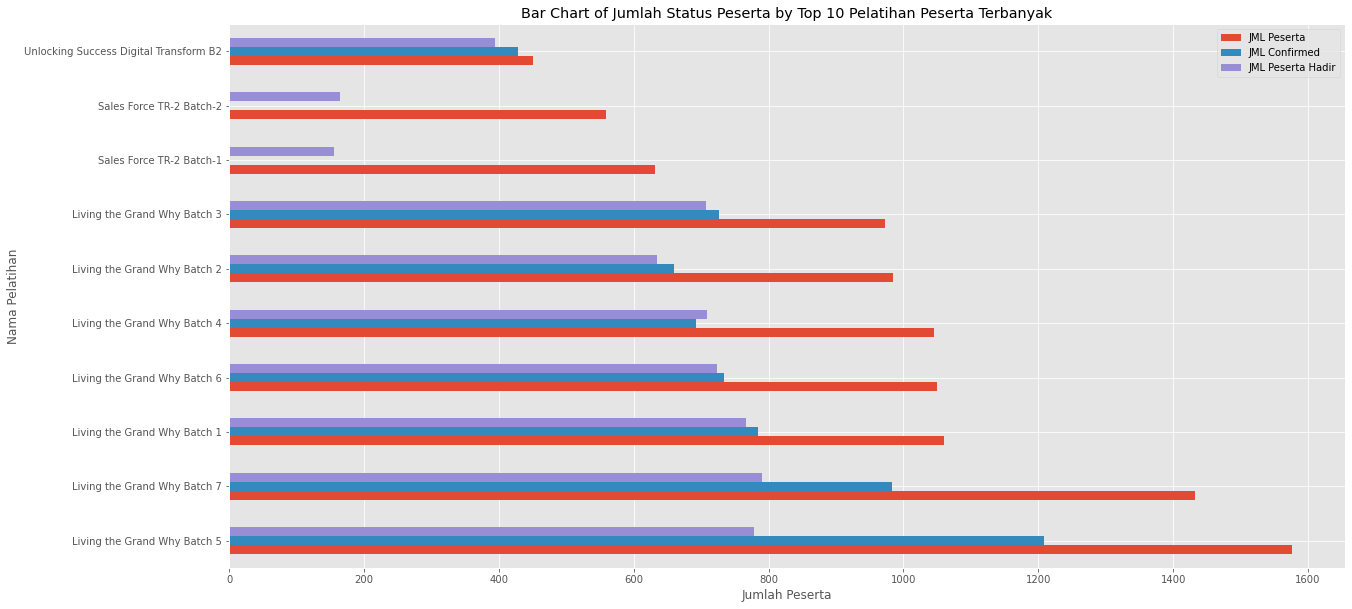

In [125]:
bx = b.plot(kind='barh',
            figsize=(20, 10))

bx.set_title('Bar Chart of Jumlah Status Peserta by Top 10 Pelatihan Peserta Terbanyak')
bx.set_ylabel('Nama Pelatihan')
bx.set_xlabel('Jumlah Peserta')

plt.show()

## Pie Chart

In [126]:
data_provider_category = data_pelatihan.groupby('Provider Category', axis=0)['JML Peserta'].sum()
data_provider_category.head()

Provider Category
External      886
Internal    46226
Name: JML Peserta, dtype: int64

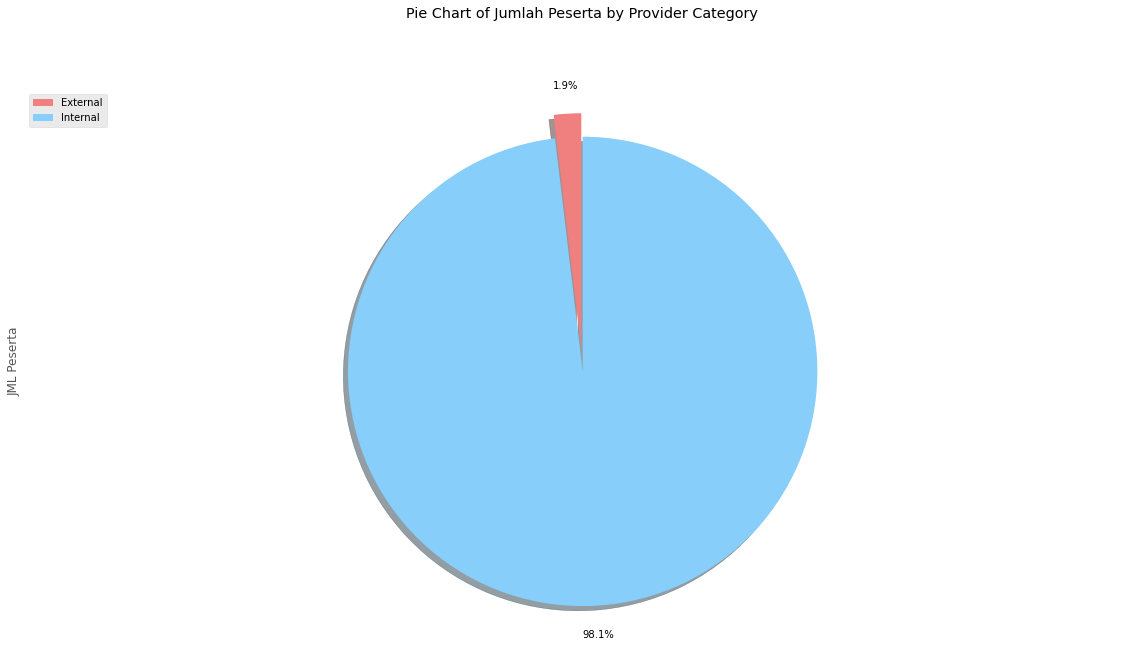

In [127]:
cx = data_provider_category.plot(kind='pie',
                      figsize=(20, 10),
                      autopct='%1.1f%%', 
                      startangle=90,    
                      shadow=True,       
                      labels=None,
                      pctdistance=1.12,
                      colors=['lightcoral', 'lightskyblue'],
                      explode=[0, 0.1]
                      )

cx.set_title('Pie Chart of Jumlah Peserta by Provider Category', y=1.12) 

cx.axis('equal') 

cx.legend(labels=data_provider_category.index, loc='upper left') 

plt.show()

## Box Plot

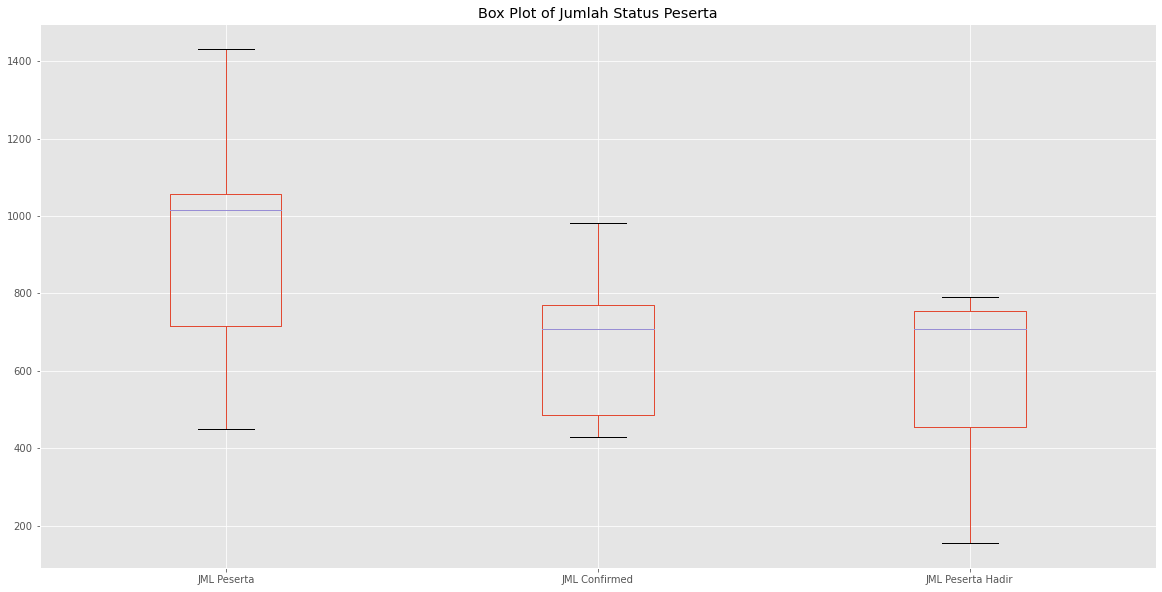

In [128]:
dx = b.plot(kind='box',
                           figsize=(20, 10),
                           showfliers=False)

dx.set_title('Box Plot of Jumlah Status Peserta') 

plt.show()

## Line Plot

In [129]:
f = data_pelatihan[['Tgl Mulai', 'JML Peserta']]
f.set_index('Tgl Mulai', inplace=True)
f.head()

,JML Peserta
Tgl Mulai,
2020-10-13,1576
2020-11-18,1432
2020-09-28,1060
2020-10-14,1050
2020-10-08,1046


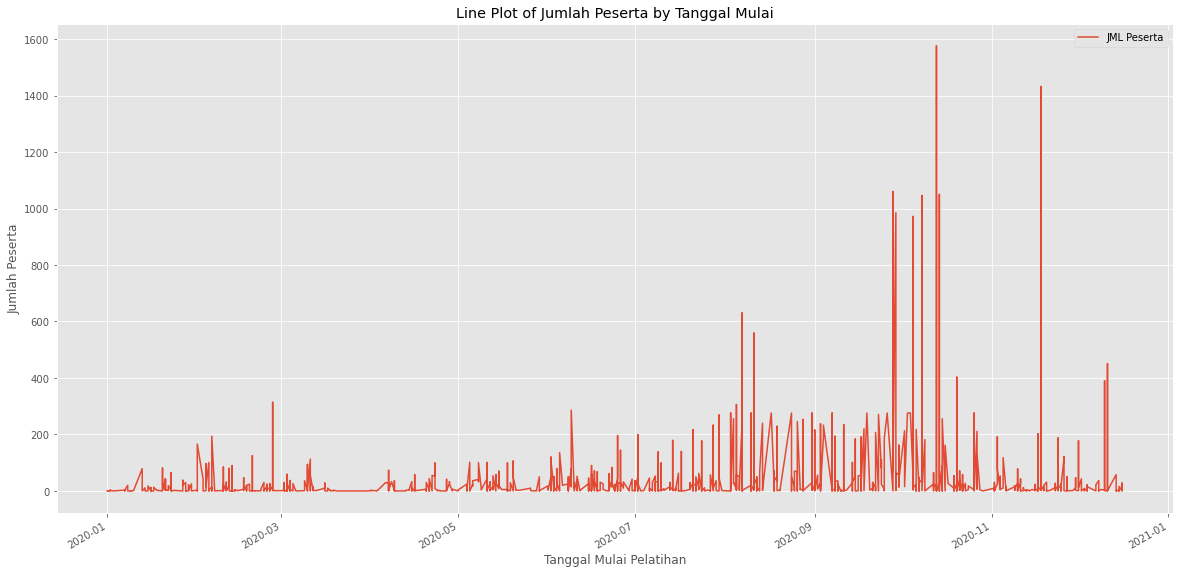

In [130]:
fx = f.plot(kind='line',figsize=(20, 10))

fx.set_title('Line Plot of Jumlah Peserta by Tanggal Mulai')
fx.set_xlabel('Tanggal Mulai Pelatihan')
fx.set_ylabel('Jumlah Peserta')
plt.show()

## Scatter Plot

In [131]:
data_satisfaction_Top10 = data_pelatihan[['Customer Satisfaction',
                                    'Customer Effort Score']].head(10)

In [132]:
fit = np.polyfit(data_pelatihan['Customer Satisfaction'].head(10),
                 data_pelatihan['Customer Effort Score'].head(10),
                 deg=1)
data_satisfaction_Top10.head()

,Customer Satisfaction,Customer Effort Score
Nama Pelatihan,,
Living the Grand Why Batch 5,90.41,90.13
Living the Grand Why Batch 7,91.10,90.55
Living the Grand Why Batch 1,88.12,88.56
Living the Grand Why Batch 6,91.05,90.40
Living the Grand Why Batch 4,91.86,92.02


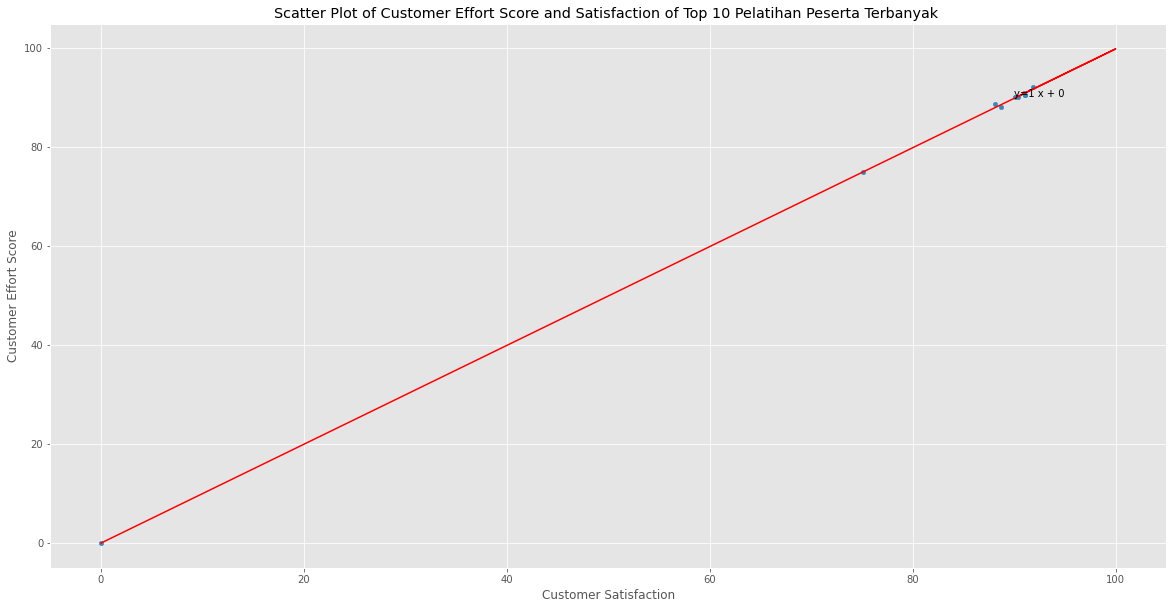

In [133]:
gx = data_satisfaction_Top10.plot(kind='scatter',
                       x='Customer Satisfaction',
                       y='Customer Effort Score',
                       figsize=(20, 10))

gx.plot(data_pelatihan['Customer Satisfaction'],
        fit[0] * data_pelatihan['Customer Satisfaction'] + fit[1],
        color='red')
gx.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(90, 90))
gx.set_title('Scatter Plot of Customer Effort Score and Satisfaction of Top 10 Pelatihan Peserta Terbanyak ')
plt.show()

## WordCloud

In [134]:
!pip install wordcloud 

In [135]:
from wordcloud import WordCloud, STOPWORDS

In [136]:
nama_pelatihan = open('dataset/Nama_Pelatihan.txt', 'r').read()
nama_pelatihan

'Nama Pelatihan\nSocial Media Ads & Analytic\nCISM\nProgrammer Development Course Amoeba\nBusiness Analytics Amoeba\nOnline UX Design Course Amoeba\nAspek Hukum dalam Pengelolaan Korporasi\nProposal Business AM Telkom Infra\nPerform Using OKR Batch 2\nKlarifikasi HCD Plan 2021\nRapat Pembahasan HCD Plan DBS 2021\nStrategic Business Analysis\nStrategic Planning Professional Level 1\nAWS Cert Solut Architect Assoc B4 2020\nOnBoarding Bootcamp DAB #16\nEvaluasi GPTP Online\n"\tMentoring Leadership in Teritorry (week-6)"\nCertified Blockchain Developer Amoeba\nInteraction Design Amoeba\nInteraction Design User Research Amoeba\nManaging Jira Cloud Projects Amoeba\nAgile & Scrum Dev Project Amoeba\nBlockchain Enterprise Proff Amoeba\nProduct Management Amoeba\nToT Core Values AKHLAK\nFinal Presentation ALP MDA Batch 2\nUnlocking Success Digital Transform B2\nCDCP(Certified Data Centre Professional)\nCoaching Mastery\nRisk Based Auditing\nUnlocking Success Digital Transform B1\nTransforming f

In [137]:
stopwords = set(STOPWORDS)

In [138]:
namapelatihan_wc = WordCloud(
    background_color='white',
    max_words=200,
    stopwords=stopwords
)

namapelatihan_wc.generate(nama_pelatihan)

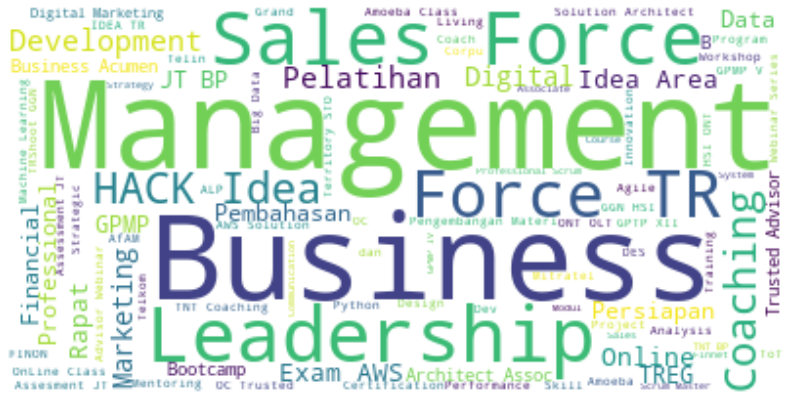

In [139]:
stopwords.add('Batch')
stopwords.add('Bangmat')
stopwords.add('Certified')

namapelatihan_wc.generate(nama_pelatihan)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(namapelatihan_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Folium 

In [140]:
loc = 'Telkom Corporate University'
title_map = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 

corpu_map = folium.Map(location =[-6.8711674, 107.5890189], zoom_start=15)
folium.Marker([-6.8711674, 107.5890189], popup='Telkom Corporate Univeristy').add_to(corpu_map)
corpu_map.get_root().html.add_child(folium.Element(title_map))

corpu_map